In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
from collections import Counter
from tkinter import filedialog

In [2]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to C:\Users\Youssef
[nltk_data]     Badreldin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Youssef
[nltk_data]     Badreldin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

<Figure size 1000x600 with 0 Axes>

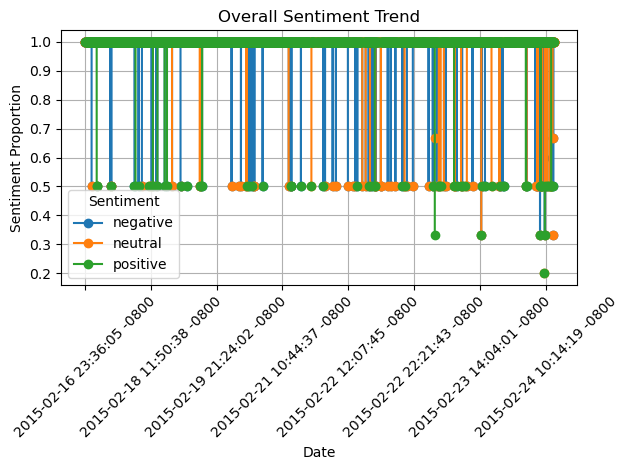

Relevant Data: Empty DataFrame
Columns: [tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone]
Index: []


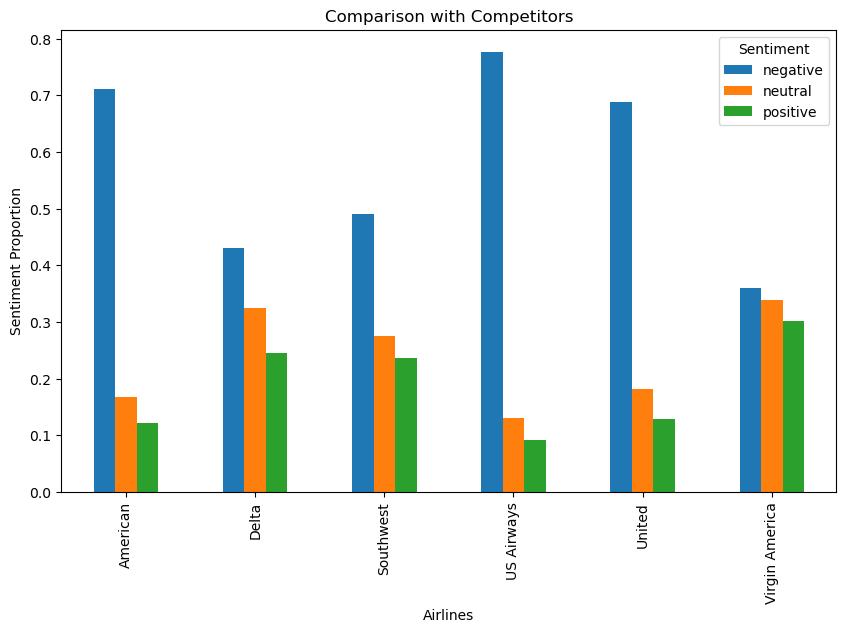

In [4]:
class SentimentAnalyzerGUI:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Sentiment Analyzer")

        # Load the vectorizer and model
        self.vectorizer = joblib.load("my_vectorizer.pkl")
        self.model = joblib.load("my_model.pkl")

        # Load the dataset
        self.dataset = pd.read_csv("Tweets.csv")  # Make sure to provide the correct path to the dataset

        self.label_airline = ttk.Label(self.root, text="Enter the name of an airline:")
        self.label_airline.grid(row=0, column=0, padx=10, pady=5, sticky="w")
        
        self.entry_airline = ttk.Entry(self.root, width=30)
        self.entry_airline.grid(row=0, column=1, padx=10, pady=5)

        self.button_analyze = ttk.Button(self.root, text="Analyze", command=self.analyze_sentiment)
        self.button_analyze.grid(row=1, column=2, padx=10, pady=5)

        self.label_result = ttk.Label(self.root, text="")
        self.label_result.grid(row=2, column=0, columnspan=3, padx=10, pady=5)
        
        self.label_sentiment = ttk.Label(self.root, text="Overall Sentiment: ")
        self.label_sentiment.grid(row=3, column=0, columnspan=3, padx=10, pady=5)

        self.label_info = ttk.Label(self.root, text="Additional Analysis Options:")
        self.label_info.grid(row=3, column=0, columnspan=3, padx=10, pady=5, sticky="w")

        self.button_overall_sentiment = ttk.Button(self.root, text="Overall Sentiment Trend", command=self.show_overall_sentiment_trend)
        self.button_overall_sentiment.grid(row=4, column=0, padx=10, pady=5, sticky="w")

        self.button_keywords = ttk.Button(self.root, text="Top Keywords", command=self.show_top_keywords)
        self.button_keywords.grid(row=4, column=1, padx=10, pady=5)

        self.button_comparison = ttk.Button(self.root, text="Comparison with Competitors", command=self.show_comparison)
        self.button_comparison.grid(row=4, column=2, padx=10, pady=5, sticky="e")

        self.button_sentiment_dist = ttk.Button(self.root, text="Sentiment Distribution", command=self.show_sentiment_distribution)
        self.button_sentiment_dist.grid(row=5, column=0, padx=10, pady=5, sticky="w")

        self.button_save_results = ttk.Button(self.root, text="Save Results", command=self.save_results)
        self.button_save_results.grid(row=5, column=2, padx=10, pady=5, sticky="e")

        self.label_custom_text = ttk.Label(self.root, text="Enter custom text:")
        self.label_custom_text.grid(row=6, column=0, padx=10, pady=5, sticky="w")
        
        self.entry_custom_text = ttk.Entry(self.root, width=50)
        self.entry_custom_text.grid(row=6, column=1, columnspan=2, padx=10, pady=5)
        
        self.button_analyze_text = ttk.Button(self.root, text="Analyze Text", command=self.analyze_text_sentiment)
        self.button_analyze_text.grid(row=7, column=2, padx=10, pady=5)
        
        self.label_text_result = ttk.Label(self.root, text="")
        self.label_text_result.grid(row=7, column=0, columnspan=3, padx=10, pady=5)

        self.label_airline_result = ttk.Label(self.root, text="")
        self.label_text_result.grid(row=8, column=0, columnspan=3, padx=10, pady=5)
        
        # Initialize attributes
        self.dataset = pd.read_csv("Tweets.csv") 
        self.vectorizer = joblib.load("my_vectorizer.pkl")  
        self.model = joblib.load("my_model.pkl")

    def analyze_sentiment(self):
        airline_name = self.entry_airline.get()
        custom_text = self.entry_custom_text.get()

        if airline_name:
            airline_tweets = self.dataset[self.dataset["airline"] == airline_name]
            if not airline_tweets.empty:
                tweet_texts = airline_tweets["text"]
                tweet_vectors = self.vectorizer.transform(tweet_texts)
                predictions = self.model.predict(tweet_vectors)

                # Count the number of each sentiment
                positive_count = sum(predictions == "positive")
                negative_count = sum(predictions == "negative")
                neutral_count = sum(predictions == "neutral")
                total_count = len(predictions)

                # Calculate percentages
                positive_percentage = positive_count / total_count * 100
                negative_percentage = negative_count / total_count * 100
                neutral_percentage = neutral_count / total_count * 100
                result = f"Positive: {positive_percentage:.2f}%  Negative: {negative_percentage:.2f}%  Neutral: {neutral_percentage:.2f}%"
                self.label_result.config(text=result)

                # Determine overall sentiment
                if positive_percentage > negative_percentage and positive_percentage > neutral_percentage:
                    overall_sentiment = "Positive"
                elif negative_percentage > positive_percentage and negative_percentage > neutral_percentage:
                    overall_sentiment = "Negative"
                else:
                    overall_sentiment = "Neutral"

                self.label_sentiment.config(text=f"Overall Sentiment: {overall_sentiment}")
            else:
                messagebox.showerror("Error", "No tweets found for the specified airline.")

        else:
            messagebox.showerror("Error", "Please enter the name of an airline or some custom text.")

    
    def analyze_text_sentiment(self):
        custom_text = self.entry_custom_text.get()
        if custom_text:
            custom_text_vector = self.vectorizer.transform([custom_text])
            prediction = self.model.predict(custom_text_vector)[0]
            relevant_data = self.dataset[self.dataset['text'] == custom_text]
            print("Relevant Data:", relevant_data)  # Debugging statement
            if not relevant_data.empty:
                negative_reason = relevant_data['negativereason'].iloc[0]
                print("Negative Reason:", negative_reason)  
                self.label_text_result.config(text=f"Predicted Sentiment: {prediction.capitalize()}")
                self.label_airline_result.config(negativereason=f"Negative Reason: {negativereason}")
            else:
                self.label_text_result.config(text=f"Predicted Sentiment: {prediction.capitalize()}")
                self.label_airline_result.config(text="No relevant negative reason found in the dataset.")
        else:
            messagebox.showerror("Error", "Please enter some custom text.")


    def show_overall_sentiment_trend(self):
        grouped_data = self.dataset.groupby('tweet_created')['airline_sentiment'].value_counts(normalize=True).unstack()

        # Plotting
        plt.figure(figsize=(10, 6))
        grouped_data.plot(kind='line', marker='o', linestyle='-')
        plt.xlabel("Date")
        plt.ylabel("Sentiment Proportion")
        plt.title("Overall Sentiment Trend")
        plt.legend(title='Sentiment')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    def show_top_keywords(self):
        # Get all tweets
        all_tweets = ' '.join(self.dataset['text'])
        blob = TextBlob(all_tweets)
        # Get top 10 most common words
        word_counts = blob.word_counts
        top_keywords = Counter(word_counts).most_common(10)
        top_keywords, counts = zip(*top_keywords)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(top_keywords, counts)
        plt.xlabel("Keywords")
        plt.ylabel("Frequency")
        plt.title("Top Keywords")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Convert top keywords to text
        top_keywords_text = "\n".join([f"{word}: {count}" for word, count in zip(top_keywords, counts)])

        # Display top keywords in a messagebox
        messagebox.showinfo("Top Keywords", top_keywords_text)

    def show_comparison(self):
        # Group tweets by airline and calculate average sentiment
        airline_sentiments = self.dataset.groupby('airline')['airline_sentiment'].value_counts(normalize=True).unstack()
        airline_sentiments.plot(kind='bar', figsize=(10, 6))
        plt.xlabel("Airlines")
        plt.ylabel("Sentiment Proportion")
        plt.title("Comparison with Competitors")
        plt.legend(title='Sentiment')
        plt.show()

    def show_sentiment_distribution(self):
        # Calculate sentiment distribution
        sentiment_counts = self.dataset['airline_sentiment'].value_counts(normalize=True)

        # Plotting
        plt.figure(figsize=(6, 4))
        sentiment_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
        plt.xlabel("Sentiment")
        plt.ylabel("Proportion")
        plt.title("Sentiment Distribution")
        plt.show()

    def save_results(self):
        file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                self.dataset.to_csv(file_path, index=False)
                messagebox.showinfo("Success", "Results saved successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"An error occurred while saving the results: {str(e)}")

    def run(self):
        self.root.mainloop()

if __name__ == "__main__":
    app = SentimentAnalyzerGUI()
    app.run()

In [5]:
import os
import subprocess

# Function to convert IPython Notebook to Python script
def convert_ipynb_to_py(notebook_filename):
    try:
        subprocess.run(["jupyter", "nbconvert", "--to", "script", notebook_filename])
        print("Conversion from IPython Notebook to Python script completed.")
    except Exception as e:
        print("An error occurred during conversion:", e)

# Specify the filename of the IPython Notebook
notebook_filename = "gui.ipynb"

# Convert IPython Notebook to Python script
convert_ipynb_to_py(notebook_filename)

# Specify Python script filename (same name as notebook)
py_filename = os.path.splitext(notebook_filename)[0] + ".py"

print("Python script filename:", py_filename)

Conversion from IPython Notebook to Python script completed.
Python script filename: gui.py
